In [209]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout,GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model


# Model

### CNN

In [114]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(60, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_392 (Conv2D)          (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_393 (Conv2D)          (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 129600)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 60)              

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [215]:
TRAINING_DIR = "./Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [241]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [118]:
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - 54s 405ms/step - loss: 0.6567 - acc: 0.6557 - val_loss: 0.1370 - val_acc: 0.9536
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
132/132 [==============================] - 52s 396ms/step - loss: 0.2877 - acc: 0.8937 - val_loss: 0.1208 - val_acc: 0.9536
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/10
132/132 [==============================] - 52s 396ms/step - loss: 0.3835 - acc: 0.8732 - val_loss: 0.1842 - val_acc: 0.9072
Epoch 4/10
132/132 [==============================] - 50s 381ms/step - loss: 0.2949 - acc: 0.8868 - val_loss: 0.0573 - val_acc: 0.9897
INFO:tensorflow:Assets written to: model2-004.model/assets
Epoch 5/10
132/132 [==============================] - 50s 381ms/step - loss: 0.2469 - acc: 0.9200 - val_loss: 0.1102 - val_acc: 0.9639
Epoch 6/10
132/132 [==============================] - 50s 381ms/step - loss: 0.2691 - acc: 0.9252 - val_loss: 0.0695 - val_acc: 0.9845
Epoch 7/10
13

Text(0.5, 1.0, 'Training and validation loss')

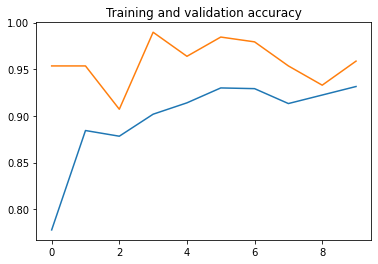

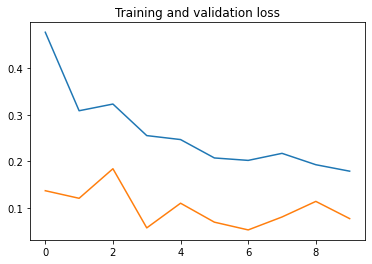

In [119]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

### MobileV2

##### 在實際用時label與 ＣＮＮ的ｌｅｂａｌ相反

In [255]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [276]:
for layer in mobilenet.layers:
    layer.trainable = False
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
#model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [277]:
model.compile(optimizer='adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [278]:
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - 29s 197ms/step - loss: 0.3207 - accuracy: 0.8676 - val_loss: 0.0291 - val_accuracy: 0.9948
Epoch 2/10
132/132 [==============================] - 25s 188ms/step - loss: 0.0913 - accuracy: 0.9717 - val_loss: 0.0223 - val_accuracy: 0.9948
Epoch 3/10
132/132 [==============================] - 24s 183ms/step - loss: 0.0504 - accuracy: 0.9868 - val_loss: 0.0197 - val_accuracy: 0.9948
Epoch 4/10
132/132 [==============================] - 24s 183ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0176 - val_accuracy: 0.9948
Epoch 5/10
132/132 [==============================] - 25s 191ms/step - loss: 0.0458 - accuracy: 0.9764 - val_loss: 0.0158 - val_accuracy: 0.9897
Epoch 6/10
132/132 [==============================] - 25s 192ms/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0.0180 - val_accuracy: 0.9948
Epoch 7/10
132/132 [==============================] - 25s 189ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0116 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

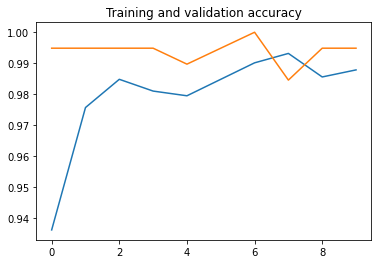

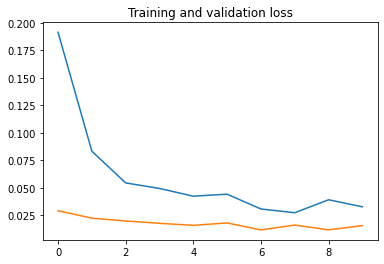

In [279]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [280]:
model.save("mask_detector_modelnetV2.h5")

In [220]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=10,
                              validation_steps=9,
                              verbose=1)

Epoch 1/10
12/12 [==============================] - 6s 321ms/step - loss: 0.7796 - accuracy: 0.5424 - val_loss: 0.3469 - val_accuracy: 0.9111
Epoch 2/10
12/12 [==============================] - 3s 228ms/step - loss: 0.3727 - accuracy: 0.8766 - val_loss: 0.1242 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 3s 265ms/step - loss: 0.2268 - accuracy: 0.9561 - val_loss: 0.1221 - val_accuracy: 0.9778
Epoch 4/10
12/12 [==============================] - 3s 232ms/step - loss: 0.2107 - accuracy: 0.9162 - val_loss: 0.0741 - val_accuracy: 0.9889
Epoch 5/10
12/12 [==============================] - 3s 231ms/step - loss: 0.1300 - accuracy: 0.9729 - val_loss: 0.0467 - val_accuracy: 0.9889
Epoch 6/10
12/12 [==============================] - 3s 236ms/step - loss: 0.1497 - accuracy: 0.9541 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 3s 253ms/step - loss: 0.1898 - accuracy: 0.9172 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

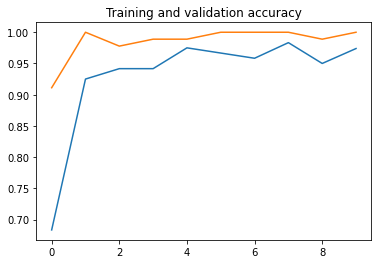

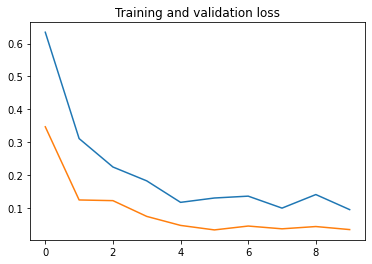

In [221]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [224]:
model.save("mask_detector_modelnetV2.h5")

# InceptionV3

In [265]:
results={0:'without mask',1:'mask'}

In [267]:
label=np.argmax(results,axis=1)[0]

AxisError: axis 1 is out of bounds for array of dimension 1